# Load Data

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fpath='Data/WMT.csv'
df=pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5479 non-null   object 
 1   Adj Close  5284 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.7+ KB


,Date,Adj Close
0,2000-01-03,44.915394
1,2000-01-04,43.234756
2,2000-01-05,42.352402
3,2000-01-06,42.814564
4,2000-01-07,46.049828


## Change date to dateime type

In [3]:
df['Date']=pd.to_datetime(df["Date"],format='%Y-%m-%d')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5479 non-null   datetime64[ns]
 1   Adj Close  5284 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.7 KB


,Date,Adj Close
0,2000-01-03,44.915394
1,2000-01-04,43.234756
2,2000-01-05,42.352402
3,2000-01-06,42.814564
4,2000-01-07,46.049828


## Set Date to index

In [4]:
df=df.set_index('Date')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2000-01-03 to 2020-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  5284 non-null   float64
dtypes: float64(1)
memory usage: 85.6 KB


,Adj Close
Date,
2000-01-03,44.915394
2000-01-04,43.234756
2000-01-05,42.352402
2000-01-06,42.814564
2000-01-07,46.049828


In [5]:
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=5479, freq=None)

## Using Resample to set frequency

In [6]:
df=df.resample('B').asfreq()#.last()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2000-01-03 to 2020-12-31
Freq: B
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  5284 non-null   float64
dtypes: float64(1)
memory usage: 85.6 KB


,Adj Close
Date,
2000-01-03,44.915394
2000-01-04,43.234756
2000-01-05,42.352402
2000-01-06,42.814564
2000-01-07,46.049828


In [7]:
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=5479, freq='B')

## Using .loc to pull years needed

In [8]:
df=df.loc['2010':'2020']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2870 entries, 2010-01-01 to 2020-12-31
Freq: B
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2769 non-null   float64
dtypes: float64(1)
memory usage: 44.8 KB


,Adj Close
Date,
2010-01-01,NaN
2010-01-04,40.963638
2010-01-05,40.555729
2010-01-06,40.465084
2010-01-07,40.487759


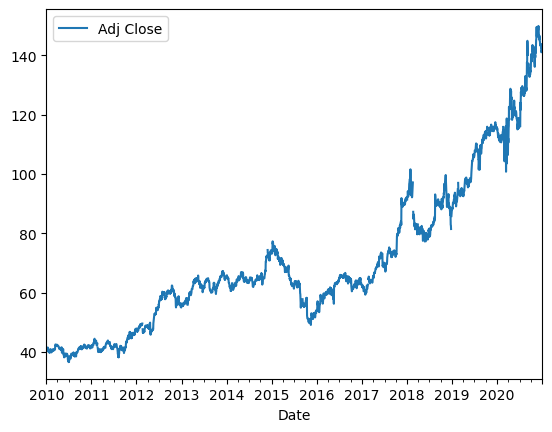

In [9]:
df.plot();

## Addressing Null values with ffill

In [10]:
df.isna().sum()

Adj Close    101
dtype: int64

In [11]:
null=df.isna()
df[null].head(10)

,Adj Close
Date,
2010-01-01,NaN
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
2010-01-11,NaN
2010-01-12,NaN
2010-01-13,NaN


In [12]:
df=df.fillna(method='ffill')
df.isna().sum()

Adj Close    1
dtype: int64

In [13]:
df.head()

,Adj Close
Date,
2010-01-01,NaN
2010-01-04,40.963638
2010-01-05,40.555729
2010-01-06,40.465084
2010-01-07,40.487759


## Dropping Null created from ffill

In [14]:
df=df.dropna()
df.head()

,Adj Close
Date,
2010-01-04,40.963638
2010-01-05,40.555729
2010-01-06,40.465084
2010-01-07,40.487759
2010-01-08,40.283802


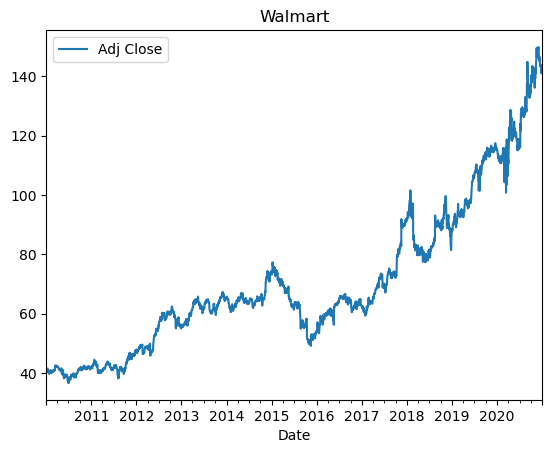

In [15]:
df.plot(title='Walmart');

In [16]:
plt.rcParams["figure.figsize"] = (12,4)
sns.set_context('talk',font_scale=.8)

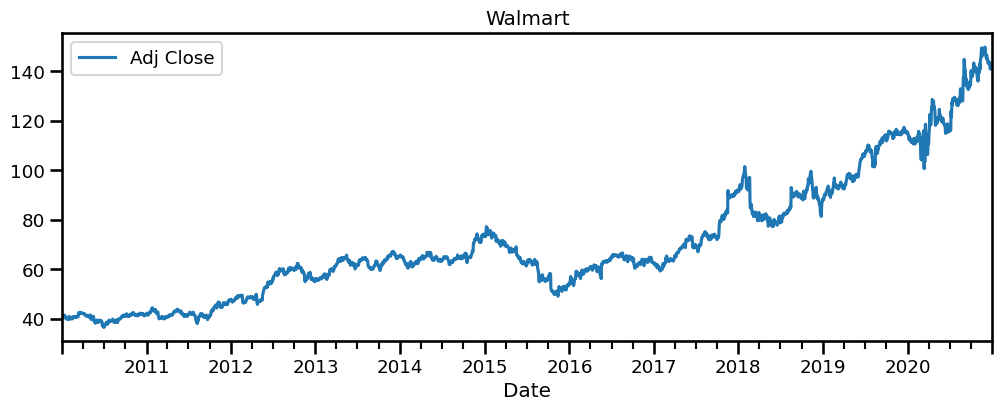

In [17]:
df.plot(title='Walmart');

## New imports needed

In [18]:
import statsmodels.tsa.api as tsa

In [19]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])


## Ad Fuller function

In [20]:
adfuller_results=get_adfuller_results(df)
adfuller_results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,1.436262,23,2845,0.997273,0.05,False


## Looking if data is stationary

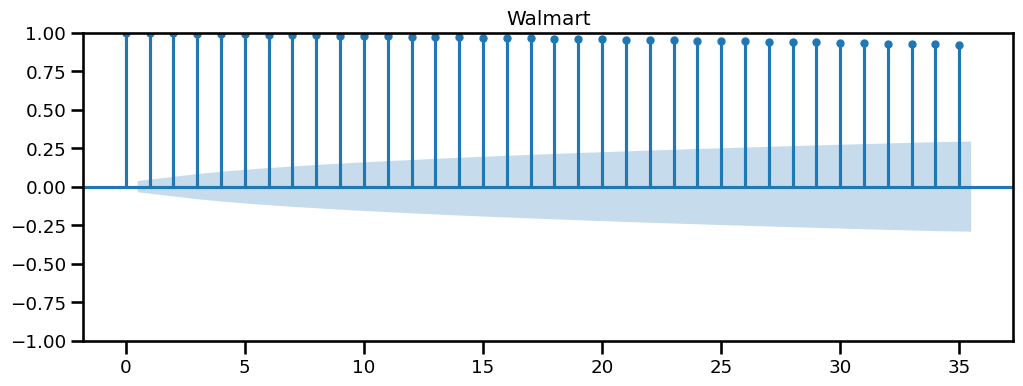

In [21]:
tsa.graphics.plot_acf(df,title='Walmart');

## Import to determin how much to diff

In [22]:
from pmdarima.arima.utils import ndiffs

In [23]:
d=ndiffs(df)
print(f'd is {d}')

d is 1


In [24]:
df.head()

,Adj Close
Date,
2010-01-04,40.963638
2010-01-05,40.555729
2010-01-06,40.465084
2010-01-07,40.487759
2010-01-08,40.283802


In [25]:
df.diff().head()

,Adj Close
Date,
2010-01-04,NaN
2010-01-05,-0.407909
2010-01-06,-0.090645
2010-01-07,0.022675
2010-01-08,-0.203957


## Saving diff data and droping nulls

In [26]:
dfd=df.diff()
dfd.info()
dfd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2869 entries, 2010-01-04 to 2020-12-31
Freq: B
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2868 non-null   float64
dtypes: float64(1)
memory usage: 44.8 KB


,Adj Close
Date,
2010-01-04,NaN
2010-01-05,-0.407909
2010-01-06,-0.090645
2010-01-07,0.022675
2010-01-08,-0.203957


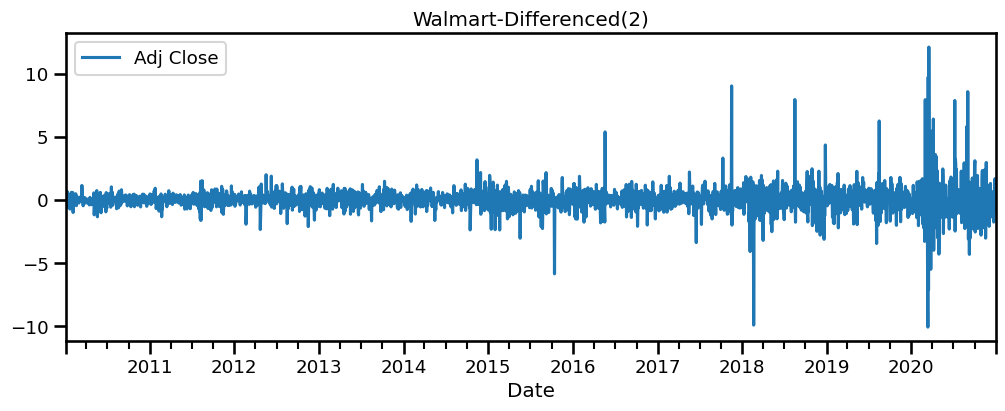

In [27]:
dfd=dfd.dropna()
dfd.plot(title='Walmart-Differenced(2)');

## Calling ad fuller function to check if data is stationary

In [28]:
get_adfuller_results(dfd)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-12.215558,22,2845,0.0,0.05,True


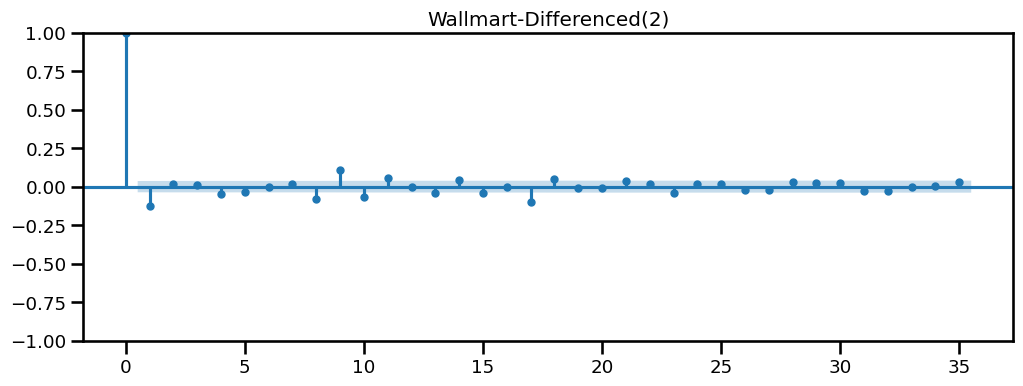

In [29]:
tsa.graphics.plot_acf(dfd,title='Wallmart-Differenced(2)');

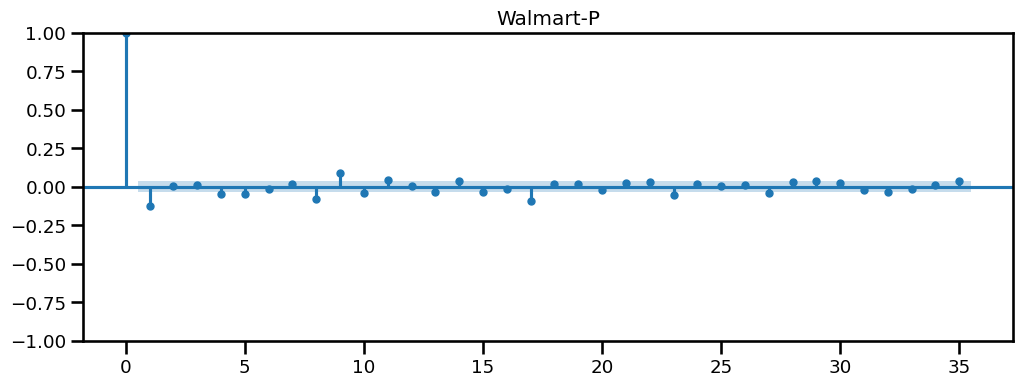

In [30]:
tsa.graphics.plot_pacf(dfd,title='Walmart-P');

## TTS with reqired test size with graph

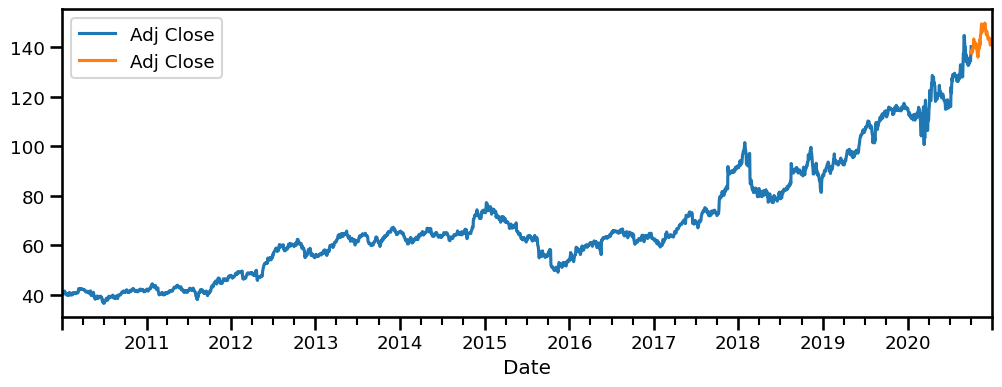

In [31]:
from pmdarima.model_selection import train_test_split
n_lag=5*13
train,test = train_test_split(df,test_size=n_lag)
ax=train.plot(label='Train')
test.plot(ax=ax,label='Test')
ax.legend();

## Calling tsa.ARIMA with pdq 

In [47]:
p=1 
d=1
q=1
arima_model=tsa.ARIMA(train,order=(p,d,q)).fit()

In [43]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax



In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics



In [45]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig



## Set up to graph arima_model made

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 3.744
- MSE = 22.319
- RMSE = 4.724
- R^2 = -0.736
- MAPE = 2.57%


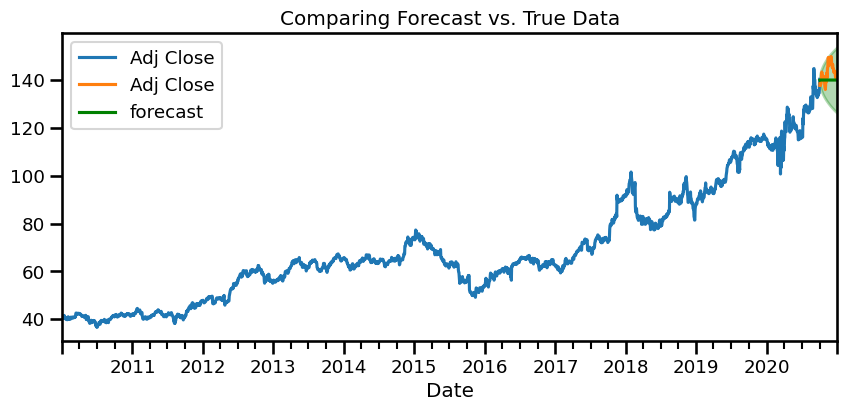

In [58]:
#Obtain summary of forcast as dataframe
forcast_df = arima_model.get_forecast(len(test)).summary_frame()

#Plot the forecast with true values
plot_forecast(train,test,forcast_df)

#Obtain metrics
regression_metrics_ts(test,forcast_df['mean'])

## Calling Summary on model

In [48]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2804
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3887.572
Date:                Thu, 26 Oct 2023   AIC                           7781.144
Time:                        13:36:20   BIC                           7798.959
Sample:                    01-04-2010   HQIC                          7787.574
                         - 10-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1806      0.050     -3.633      0.000      -0.278      -0.083
ma.L1          0.0621      0.052      1.190      0.234      -0.040       0.164
sigma2         0.9380      0.006    146.420      0.000       0.925       0.951
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            113802.87
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              10.47   Skew:                             0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Calling plot_diagnositics() on model

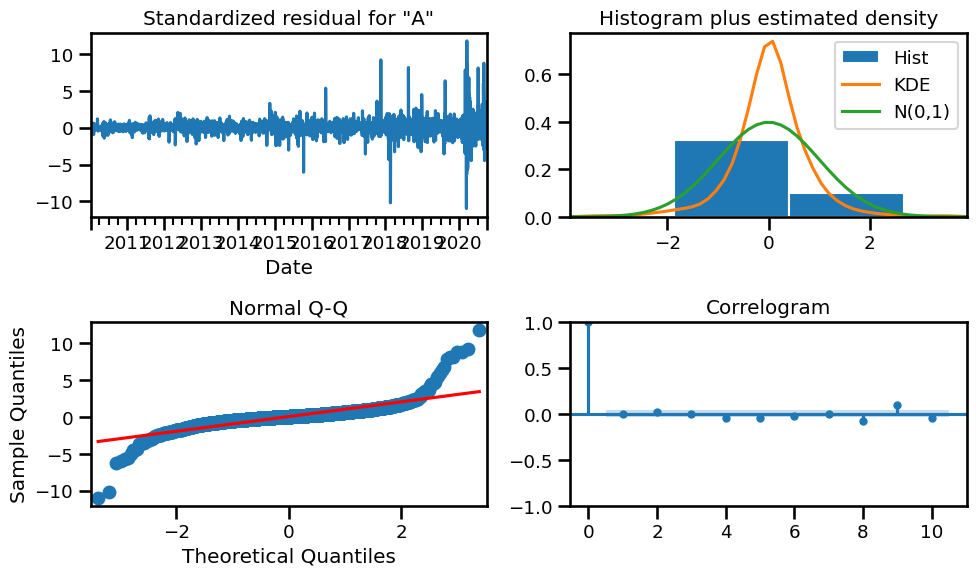

In [38]:
fig=arima_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

## Using a loop to find best fitting model

In [39]:
import itertools

p_val = range(0,4)
d_val = [1]
q_val = range(0,4)

pdq_try = list(itertools.product(p_val,d_val,q_val))

pdq_try

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [40]:
# define starting aic as infinity
best_aic = float("inf")  

# define baseline for pdq
best_pdq = (0,0,0)

# Loop through each combination
for pdq in pdq_try:
    
    model = tsa.ARIMA(train, order=pdq)
                              
    result = model.fit()
    
    print(pdq, result.aic)      
    
    # If lower, replace best AIC with new value
    if result.aic < best_aic:
        
        best_aic = result.aic
        best_pdq = pdq

# Print the best orders and AIC score
print("Best AIC:", best_aic)
print("Best pdq:", best_pdq)



(0, 1, 0) 7817.420438433815
(0, 1, 1) 7780.482784762378
(0, 1, 2) 7781.152992998199
(0, 1, 3) 7782.82431053337
(1, 1, 0) 7779.321830588688
(1, 1, 1) 7781.144094573267
(1, 1, 2) 7781.943450862429
(1, 1, 3) 7778.234406481209
(2, 1, 0) 7781.127658164627
(2, 1, 1) 7783.302024785685


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 2) 7783.3052173271035
(2, 1, 3) 7769.195763909167
(3, 1, 0) 7783.1065459388155
(3, 1, 1) 7785.127596608608


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 2) 7772.0374542573445
(3, 1, 3) 7771.182277293623
Best AIC: 7769.195763909167
Best pdq: (2, 1, 3)


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Calling tsa.ARIMA on new model

In [53]:
p=3
d=1
q=3

arima1_model = tsa.ARIMA(train, order=(p,d,q)).fit()

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Calling .summary() on new model

In [54]:
arima1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2804
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3878.591
Date:                Thu, 26 Oct 2023   AIC                           7771.182
Time:                        13:40:11   BIC                           7812.751
Sample:                    01-04-2010   HQIC                          7786.186
                         - 10-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4999      0.052     28.632      0.000       1.397       1.603
ar.L2         -0.8275      0.075    -11.093      0.000      -0.974      -0.681
ar.L3         -0.0172      0.046     -0.371      0.710      -0.108       0.073
ma.L1         -1.6235      0.054    -29.817      0.000      -1.730      -1.517
ma.L2          1.0334      0.078     13.188      0.000       0.880       1.187
ma.L3         -0.1238      0.049     -2.553      0.011      -0.219      -0.029
sigma2         0.9318      0.007    133.016      0.000       0.918       0.946
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            106424.74
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              10.32   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Setting up new model to graph 

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 4.141
- MSE = 26.173
- RMSE = 5.116
- R^2 = -1.035
- MAPE = 2.85%


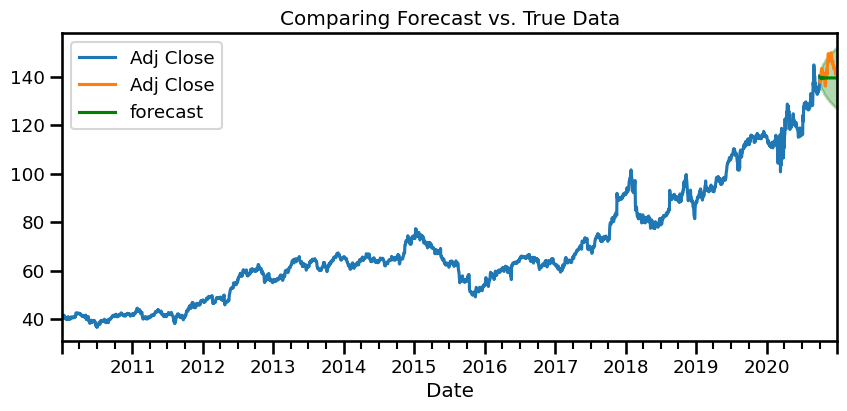

In [55]:
#Obtain summary of forcast as dataframe
forcast_df = arima1_model.get_forecast(len(test)).summary_frame()

#Plot the forecast with true values
plot_forecast(train,test,forcast_df)

#Obtain metrics
regression_metrics_ts(test,forcast_df['mean'])

    - First model has a MAPE OF 2.57%
        - Second model MAPE of 2.85%

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 3.744
- MSE = 22.319
- RMSE = 4.724
- R^2 = -0.736
- MAPE = 2.57%


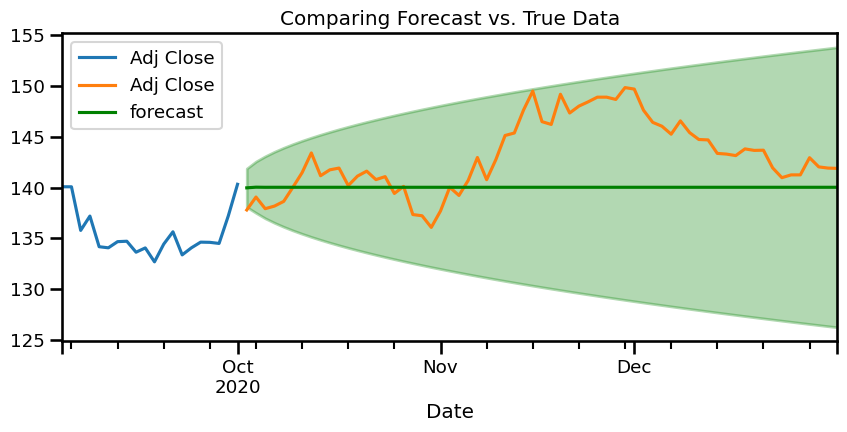

In [57]:
#Obtain summary of forcast as dataframe
forcast_df = arima_model.get_forecast(len(test)).summary_frame()

#Plot the forecast with true values
plot_forecast(train.tail(20),test,forcast_df)

#Obtain metrics
regression_metrics_ts(test,forcast_df['mean'])

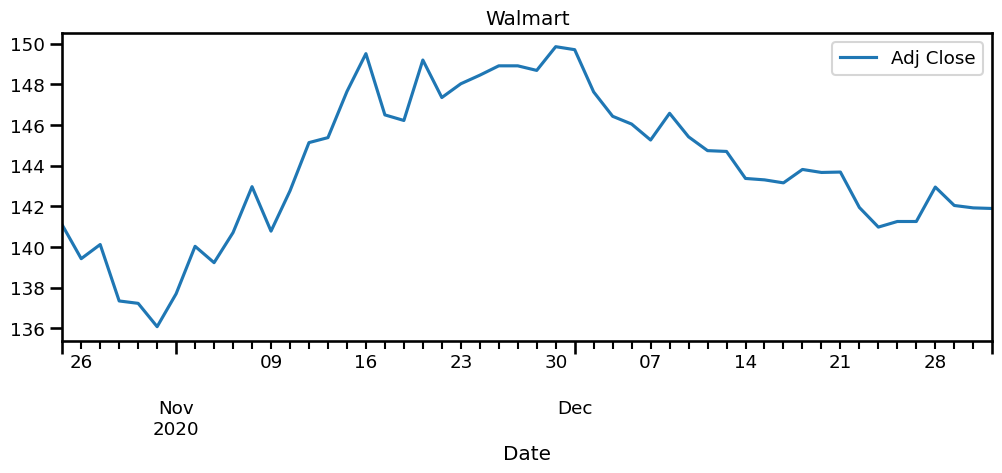

In [61]:
df.tail(50).plot(title='Walmart');